# Modeling
The modeling phase of this project consists of 2 approaches of learning, in which we plan to test and grid search among the best and most accurate model. below we are going to develope the theoretical foundations of these algorithms:

- Regression, for regression we are using these machine learning algorithms, train the model based on the best hyperparameter combination and finally select the most accurate model.
    - multiple linear regression
    - polynomial regression
    - ridge
    - lasso
    - support vector machine
    - k-nearest neighbor
    - decision tree
    - random forest
- binary-class classification, we have 2 classification problems in this project, one binary classification, one multi class classification, implemented algorithms for classification will be these algorithms:
    - logistic regression
    - k-nearest neighbor
    - decision tree
    - support vector machine
    - gradient boosting
- for unsupervised learning and clusteirng approach of this project we will implement density-based clusteirng and DBSCAN algorithm.
----

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
import matplotlib
warnings.filterwarnings("ignore")
import seaborn as sns
from openpyxl import load_workbook
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tqdm import tqdm

In [3]:
xls = pd.ExcelFile('data/Main Dataset V3.0 .xlsx')
ad_post = pd.read_excel(xls, 'Ad-Post')
ad_story = pd.read_excel(xls, 'Ad-Story')
influencer = pd.read_excel(xls, 'Influencer')
leaders_post = pd.read_excel(xls, 'Leaders-Post')
leaders_story = pd.read_excel(xls, 'Leaders-Story')
post = pd.read_excel(xls, 'Post')
story = pd.read_excel(xls, 'Story')
print('Datasets Loaded Completely.')

Datasets Loaded Completely.


since there are some categorical variables, we need to address them before using them for training the models based on them, since we are using multiple approaches thus the encoding approach can be different. for instance when we are using algorithms based on tree, label encoding is better than one hot encoding. on that circumstances, we are implementing different encoding and use the apropriate one for modeling technique.

In [129]:
#dummying dataset

# advertising posts
dummy_field = pd.get_dummies(ad_post['field'], prefix='field')
ad_post_dummy = pd.concat([ad_post, dummy_field], axis=1)
ad_post_dummy.drop(['field'], axis=1, inplace=True)

# advertising stories
dummy_field = pd.get_dummies(ad_story['field'], prefix='field')
ad_story_dummy = pd.concat([ad_story, dummy_field], axis=1)
ad_story_dummy.drop(['field'], axis=1, inplace=True)

#influencer
dummy_gender = pd.get_dummies(influencer['gender'], prefix='gender')
dummy_field = pd.get_dummies(influencer['field'], prefix='field')
influencer_dummy = pd.concat([influencer, dummy_gender, dummy_field], axis=1)
influencer_dummy.drop(['gender', 'field'], axis=1, inplace=True)

#leaders posts
dummy_gender = pd.get_dummies(leaders_post['gender'], prefix='gender')
leaders_post_dummy = pd.concat([leaders_post, dummy_gender], axis=1)
leaders_post_dummy.drop(['gender'], axis=1, inplace=True)

In [137]:
# label encoding dataset

# advertising posts
labels, _ = pd.factorize(ad_post['field'])
ad_post_labelencoded = ad_post
ad_post_labelencoded['field_labelencoded'] = labels.tolist()

# advertising stories
labels, _ = pd.factorize(ad_story['field'])
ad_story_labelencoded = ad_story
ad_story_labelencoded['field_labelencoded'] = labels.tolist()

# influencer
labels, _ = pd.factorize(influencer['gender'])
influencer_labelencoded = influencer
influencer_labelencoded['gender_labelencoded'] = labels.tolist()
labels, _ = pd.factorize(influencer['field'])
influencer_labelencoded['field_labelencoded'] = labels.tolist()

# leaders post
labels, _ = pd.factorize(leaders_post['gender'])
leaders_post_labelencoded = leaders_post
leaders_post_labelencoded['gender_labelencoded'] = labels.tolist()

## Regression
### Linear Regression

In [139]:
from sklearn.linear_model import LinearRegression

In [94]:
ad_post_y = np.asarray(ad_post_dummy['cost'])
ad_post_x = np.asarray(ad_post_dummy.loc[:, ['follower', 'view', 'threshold', 'field_art & culture', 'field_fact', 'field_video', 'field_video']])

In [98]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_post_x):
        X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
        y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
        reg_lr_unnormalize = LinearRegression()
        reg_lr_normalize = LinearRegression(normalize=True)
        reg_lr_unnormalize.fit(X_train, y_train)
        reg_lr_normalize.fit(X_train, y_train)
        temp_lst2 = []
        temp_lst2.append(i)
        temp_lst2.append(reg_lr_unnormalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_normalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_unnormalize.score(X_test, y_test))
        temp_lst2.append(reg_lr_normalize.score(X_test, y_test))
        temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    temp_lst2 = []
    temp_lst2.append(k)
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Test Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Test Score']), decimals=4))
    temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 71.62it/s]


,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,0.95,0.95,0.71,0.71
1,3,0.93,0.93,0.77,0.77
2,4,0.93,0.93,0.48,0.48
3,5,0.93,0.93,0.54,0.54
4,6,0.92,0.92,0.35,0.35
5,7,0.92,0.92,0.05,0.05
6,8,0.92,0.92,-0.04,-0.04
7,9,0.92,0.92,-3.50,-3.50


as you can see the best model for linear regression was 3-folded with accuracy of 77% in test dataset. in the cell below we are going to implement this as final model, also normalizing data wouldn't affect the overall accuracy so we dont normalize data.

In [99]:
kf = KFold(n_splits = 3)
temp_lst = []
reg_lr = LinearRegression()
for train_index, test_index in kf.split(ad_post_x):
    X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
    y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
    reg_lr.fit(X_train, y_train)

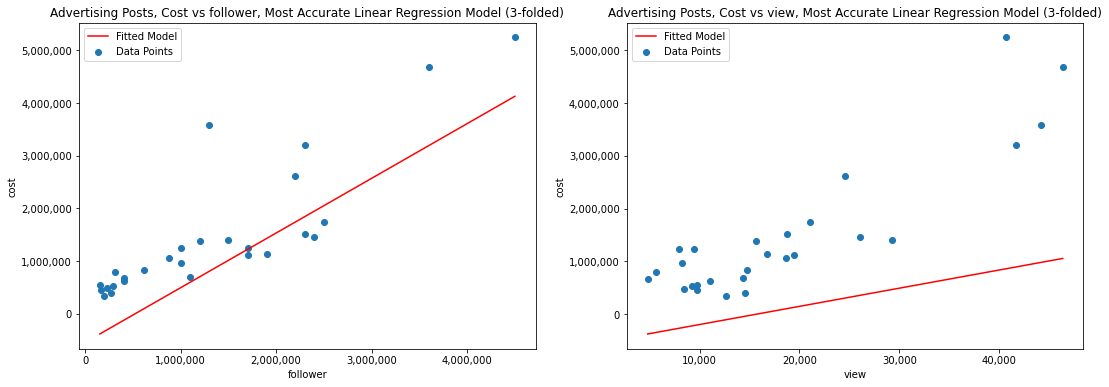

In [120]:
fig = plt.figure(figsize = (18, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

axs = [ax1, ax2]
feature_lst = ['follower', 'view']

for ax, feature in zip(axs, feature_lst):
    ax.scatter(ad_post_dummy[feature], ad_post_dummy['cost'], label='Data Points')
    X_plot = np.arange(ad_post_dummy[feature].min(), ad_post_dummy[feature].max() , 1)
    y_plot = reg_lr.coef_[axs.index(ax)] * X_plot + reg_lr.intercept_
    ax.plot(X_plot, y_plot, '-r', label='Fitted Model')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_title(f'Advertising Posts, Cost vs {feature}, Most Accurate Linear Regression Model (3-folded)')
    ax.set_xlabel(feature)
    ax.set_ylabel('cost')
    ax.legend()
plt.show()

### Polynomial Regression